In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
X_train=np.loadtxt('train_X.csv', delimiter=',').T
Y_train=np.loadtxt('train_label.csv', delimiter=',').T

X_test=np.loadtxt('test_X.csv', delimiter=',').T
Y_test=np.loadtxt('test_label.csv', delimiter=',').T

In [4]:
print(X_train.shape)


(784, 1000)


<function matplotlib.pyplot.show(close=None, block=None)>

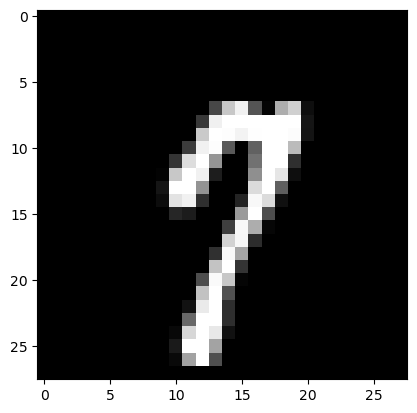

In [7]:
index=random.randrange(0,X_train.shape[1])
plt.imshow(X_train[:,index].reshape(28,28),cmap='gray')
plt.show

In [8]:
def tanh(x):
    return np.tanh(x)
def relu(x):
    return np.maximum(x,0)
def softmax(x):
    expX=np.exp(x)
    return expX/np.sum(expX, axis = 0)

In [23]:
def derivative_tanh(x):
    return(1-np.power(np.tanh(x),2))
def derivative_relu(x):
    return np.array(x>0, dtype=np.float32)
    

In [10]:
#Initializing Parameters

In [11]:
def initialize_parameters(n_x,n_h,n_y):
    w1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    w2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    parameters={"w1":w1,"b1":b1,"w2":w2,"b2":b2}
    return parameters
    

In [12]:
#Forward Propogation


In [13]:
def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = tanH(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_cache


In [14]:
def cost_function(a2, y):
    m = y.shape[1]
    
    cost = -(1/m)*np.sum(y*np.log(a2))
    
    #cost = -(1/m)*np.sum(np.sum(y*np.log(a2, 0), 1))
    
    return cost

In [15]:
#Backward Propogation

In [16]:

def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

In [17]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [18]:
def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

In [24]:
iterations = 500
n_h = 1000
learning_rate = 0.02
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)


Cost after 0 iterations is : 2.372369614392677
Cost after 50 iterations is : 0.4897839172932702
Cost after 100 iterations is : 0.31485863191249414
Cost after 150 iterations is : 0.2337322579982179
Cost after 200 iterations is : 0.18377026639411143
Cost after 250 iterations is : 0.14938726280089804
Cost after 300 iterations is : 0.12436826353482028
Cost after 350 iterations is : 0.10556797467988147
Cost after 400 iterations is : 0.09110360755856972
Cost after 450 iterations is : 0.07974687405718245


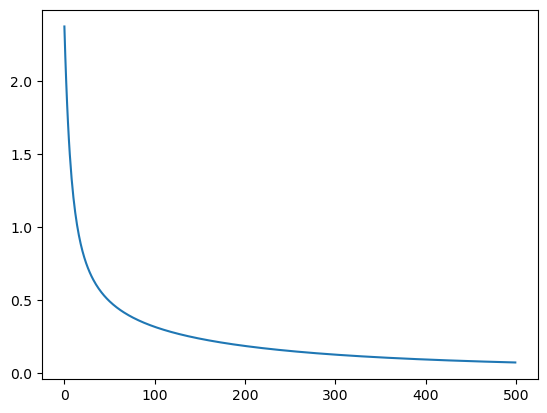

In [25]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [21]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [27]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")


Accuracy of Train Dataset 100.0 %
Accuracy of Test Dataset 87.43 %


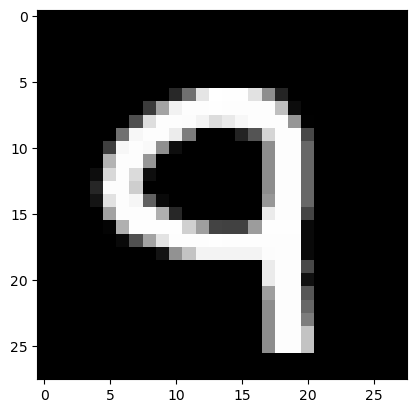

Our model says it is : 9


In [29]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])